# Power Spectrum 
## Calculate the power spectrum using a 3D grid
Generate a the density field of the galaxy positions using a 3D grid
Using the 3D grid, then calculate the power spectrum using the powerbox package

In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
#ngals = len(gals)
#print(ngals)
#gals.columns #returns all avaiable properties of galxies
#gals[gals.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]# remove infs
#gals.dropna()# drop nan values

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]
print(reds)
print(snaps)

# get mass and convert to proper units
#gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
#HI_Mass = gals["HIMass"]

# using positions [x,y,x]
pos_x = gals["Pos_0"]
pos_y = gals["Pos_1"]
pos_z = gals["Pos_2"]

Pos = np.array([pos_x, pos_y, pos_z])
Pos.T.shape
Pos_new=Pos.T # Transpose the Pos so it is in format (N,D) array
Pos_new.shape

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
gals.columns #returns all avaiable properties of galxies

#sim_props # returns sim props if you want to check

[4.9999988  4.01575197 2.99733298 2.00100053 1.50871276 0.99933302
 0.50100094 0.        ]
[100 115 134 158 173 192 216 250]


Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

## Create 3D grid of galaxy positions
### 1. Calculate the edges of the grid
### 2. Calculate the deltax
    delta x = (Pos/edges)
### 3. Get the 3D grid
    using histogram 3D

In [2]:
# getting bits ready for 3D grid 
boxsize = 178.57142857142858 # get the box size, this is from sims pops 
dim = len(Pos) # number of dimensions in 3D space =3
boxlength = [boxsize] * dim #get box length for each side of box
N = pos_x.shape # = 1648367
#N = 100
V = np.product(boxlength)
#print('dim : ', dim)
#print('boxlength : ', boxlength)
#print('N : ', N)
#print('V : ', V)
#N_dim = [N] * dim # to make iterable
#print('N : ', N)
#print('Pos : ', Pos)
#Pos = np.squeeze(Pos)
#print('Pos : ', Pos)
#N[0] / boxsize

In [14]:
nbins=100 # define the number of bins for our 3D grid
deltax, edges = np.histogramdd(Pos_new, bins=nbins) #[0].astype("float") # calculate the 3D grid using histogramdd
deltax.shape, edges[0].size, edges[1].size, edges[2].size
#so its done 10 x omega = deltax / np.mean(deltax) - 1 # calcualte the over density
#print('omega: ', omega)10 x 10 by default
deltax # This returns the number of galaxies in each grid

array([[[ 1., 16.,  0., ..., 17.,  1.,  0.],
        [ 4., 18.,  7., ...,  2.,  9.,  1.],
        [ 3.,  0.,  0., ...,  2.,  2., 15.],
        ...,
        [ 0.,  1.,  0., ...,  3.,  5.,  1.],
        [ 0.,  0.,  0., ...,  4.,  3.,  1.],
        [ 0.,  0.,  0., ...,  6., 15.,  0.]],

       [[ 1.,  1.,  1., ...,  9.,  7.,  3.],
        [ 0.,  0.,  0., ..., 23., 12.,  0.],
        [ 0.,  1.,  0., ...,  2.,  1.,  0.],
        ...,
        [ 0.,  4.,  4., ...,  1.,  1.,  7.],
        [ 0.,  1.,  1., ...,  0.,  4.,  2.],
        [ 2.,  4.,  0., ...,  0.,  8.,  3.]],

       [[ 0.,  0.,  0., ...,  5., 47.,  4.],
        [ 0.,  0.,  0., ...,  9.,  2.,  1.],
        [ 0.,  0.,  3., ...,  1.,  0.,  2.],
        ...,
        [ 7.,  2.,  6., ...,  0.,  0.,  5.],
        [18., 17., 10., ...,  1.,  2., 20.],
        [ 2.,  2.,  0., ...,  2., 12., 15.]],

       ...,

       [[ 0.,  0.,  1., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.

## Do calculations (mean and total)
Calculate the average number of galaxies (mean)
And the num of galaxies (which should jsut be the total number in the sample 1648367.0)

In [15]:
omega = deltax / np.mean(deltax) - 1 # calcualte the over density
#print('omega: ', omega)
omega

array([[[-0.39333898,  8.70657627, -1.        , ...,  9.31323728,
         -0.39333898, -1.        ],
        [ 1.42664407,  9.9198983 ,  3.24662712, ...,  0.21332203,
          4.45994915, -0.39333898],
        [ 0.81998305, -1.        , -1.        , ...,  0.21332203,
          0.21332203,  8.09991525],
        ...,
        [-1.        , -0.39333898, -1.        , ...,  0.81998305,
          2.03330508, -0.39333898],
        [-1.        , -1.        , -1.        , ...,  1.42664407,
          0.81998305, -0.39333898],
        [-1.        , -1.        , -1.        , ...,  2.6399661 ,
          8.09991525, -1.        ]],

       [[-0.39333898, -0.39333898, -0.39333898, ...,  4.45994915,
          3.24662712,  0.81998305],
        [-1.        , -1.        , -1.        , ..., 12.95320338,
          6.2799322 , -1.        ],
        [-1.        , -0.39333898, -1.        , ...,  0.21332203,
         -0.39333898, -1.        ],
        ...,
        [-1.        ,  1.42664407,  1.42664407, ..., -

## Calculate the density and the PS

In [16]:
# Calculate power spectrum using powerbox package function get_power
p_k_field, bins_field = get_power(omega, boxlength)#, deltax2=None, N=N, a=1., b=1., remove_shotnoise=True,
              #bins=None, res_ndim=None, weights=None, weights2=None,
              #dimensionless=True, bin_ave=True, get_variance=False, log_bins=False, ignore_zero_mode=False,
              #k_weights = 1,
              #)
                
                
print('p_k_field: ', p_k_field)
print('bins_field: ', bins_field)


p_k_field:  [2.28049758e+04 7.19283904e+03 3.62970893e+03 2.06983207e+03
 1.29835118e+03 9.81485910e+02 7.54174485e+02 5.95887144e+02
 4.70606528e+02 3.75158253e+02 3.09716048e+02 2.57850169e+02
 2.11915413e+02 1.78223102e+02 1.51220438e+02 1.24648646e+02
 1.02994025e+02 8.81275957e+01 7.58586037e+01 6.43345766e+01
 5.58110696e+01 4.85538114e+01 4.24830208e+01 3.75692933e+01
 3.33622297e+01 3.05101714e+01 2.80439155e+01 2.49476944e+01
 2.20122864e+01 2.01257304e+01 1.80903947e+01 1.65838288e+01
 1.53749881e+01 1.43250280e+01 1.34783129e+01 1.25616927e+01
 1.18331826e+01 1.06211950e+01 1.00671305e+01 9.63059678e+00
 9.03412714e+00 8.55382140e+00 8.16048286e+00 7.79497626e+00
 8.82192390e+00]
bins_field:  [0.04799214 0.10959976 0.17428318 0.2405599  0.30784351 0.37472226
 0.44200932 0.51023162 0.57794496 0.64476824 0.71159926 0.77940613
 0.84666307 0.91401959 0.98231731 1.05031773 1.11841142 1.18574607
 1.25337056 1.32152162 1.38861865 1.45591685 1.52397183 1.59201049
 1.65958056 1.72693

## Now lets do the HI Mass Power Spectrum
### The only difference is that we add weights (HI_Mass is the weights for the PS)

In [17]:
p_k_field_HI_Mass, bins_field_HI_Mass = get_power(omega, boxlength, weights=gals["HIMass"])#, deltax2=None, N=N, a=1., b=1., remove_shotnoise=True,
                
print('p_k_field (HI Mass): ', p_k_field_HI_Mass)
print('bins_field (HI Mass): ', bins_field_HI_Mass)

p_k_field:  [2.28049758e+04 7.19283904e+03 3.62970893e+03 2.06983207e+03
 1.29835118e+03 9.81485910e+02 7.54174485e+02 5.95887144e+02
 4.70606528e+02 3.75158253e+02 3.09716048e+02 2.57850169e+02
 2.11915413e+02 1.78223102e+02 1.51220438e+02 1.24648646e+02
 1.02994025e+02 8.81275957e+01 7.58586037e+01 6.43345766e+01
 5.58110696e+01 4.85538114e+01 4.24830208e+01 3.75692933e+01
 3.33622297e+01 3.05101714e+01 2.80439155e+01 2.49476944e+01
 2.20122864e+01 2.01257304e+01 1.80903947e+01 1.65838288e+01
 1.53749881e+01 1.43250280e+01 1.34783129e+01 1.25616927e+01
 1.18331826e+01 1.06211950e+01 1.00671305e+01 9.63059678e+00
 9.03412714e+00 8.55382140e+00 8.16048286e+00 7.79497626e+00
 8.82192390e+00]
bins_field:  [0.04799214 0.10959976 0.17428318 0.2405599  0.30784351 0.37472226
 0.44200932 0.51023162 0.57794496 0.64476824 0.71159926 0.77940613
 0.84666307 0.91401959 0.98231731 1.05031773 1.11841142 1.18574607
 1.25337056 1.32152162 1.38861865 1.45591685 1.52397183 1.59201049
 1.65958056 1.72693

# PLOT
## GALAXY PS

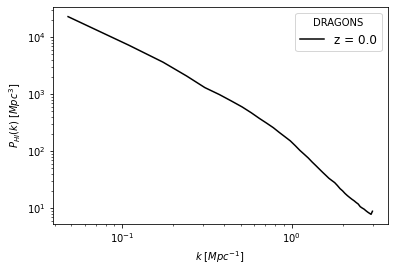

In [19]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(bins_field,p_k_field,color="black", label=label_z)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("PowerSpectrum_Galaxies" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")

# HI MASS PS

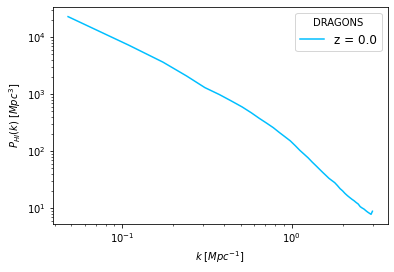

In [20]:
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
#ax.set_ylim([0,3500])
#ax.set_xlim([0.1,1])
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P_{HI}(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(bins_field_HI_Mass,p_k_field_HI_Mass,color="deepskyblue", label=label_z)

plt.legend(title=("DRAGONS"),
           loc='upper right',
           fontsize=12)

nbins = str(nbins)
name_of_plot=("PowerSpectrum_HIMass" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")